Получение исходных данных

In [378]:
from basepolygon_class import GoalPolygon

place = GoalPolygon('Жилой комплекс «Одинцово-1»')
v = place.polygon

/Users/andrewastakhov/opt/anaconda3/envs/work/lib/python3.9/site-packages/osmnx/geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))
/Users/andrewastakhov/opt/anaconda3/envs/work/lib/python3.9/site-packages/osmnx/geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))
/Users/andrewastakhov/opt/anaconda3/envs/work/lib/python3.9/site-packages/osmnx/geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))


Геометрическое упрощение

In [379]:
def get_xy(s):
    x, y = s.centroid.coords.xy
    return x[0], y[0]

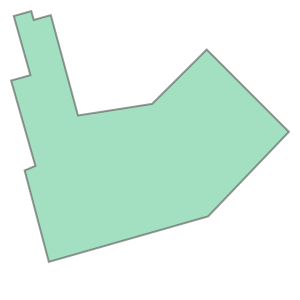

In [380]:
from shapely.affinity import translate

s = v.simplify(10, preserve_topology=True)
x, y = get_xy(s)
st = translate(s, 0-x, 0-y)

st

In [476]:
# убрать бы эту ебань
coor_list = (list(st.boundary.coords[0:len(st.boundary.coords) - 1]))
print (coor_list)

[(-457.0172720783157, 258.9744913103059), (-366.09260647482006, -60.90662323124707), (-406.3709288823302, -78.09141644183546), (-315.6018337656278, -420.78100279159844), (281.6218242335599, -250.2765722963959), (584.499882498465, 66.75690660253167), (276.3574749502586, 375.14895246643573), (71.72904935950646, 171.57023276388645), (-206.33228341699578, 128.09713660925627), (-308.2299947500578, 504.25448064878583), (-372.1630306051229, 486.32548693101853), (-381.46358069963753, 519.3486963510513), (-447.1716974315932, 500.9196722973138), (-384.71937846933724, 279.2426329497248)]


Декомпозиция периметра

In [382]:
import numpy as np
from math import pi, cos, sin

target = pi/2
basis = np.array([[1, 0, 0],[0, 1, 0]])
tolerance=0.75

In [383]:
transform = np.array(
    [
        [cos(target), -sin(target), 0],
        [sin(target), cos(target), 0],
        [0, 0, 1]
    ]
)
transform

array([[ 0., -1.,  0.],
       [ 1.,  0.,  0.],
       [ 0.,  0.,  1.]])

In [484]:
metric = np.complex(np.cross(basis[0], basis[1])[-1],
                             np.cross(basis[1], basis[0])[-1])


/var/folders/ck/jb6rmtxx78j862ljh049mjtw0000gn/T/ipykernel_1817/2402548898.py:1: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  metric = np.complex(np.cross(basis[0], basis[1])[-1],


In [503]:
from itertools import islice, cycle

def vec_search(point_list, key):
    cr = []
    n = list(islice(cycle(range(len(point_list))), 0, len(point_list) + 2))
    for i in range(len(point_list)):
        v_one = [point_list[n[i]][0] - point_list[n[i + 1]][0], point_list[n[i]][1] - point_list[n[i + 1]][1], 0]
        v_two = [point_list[n[i + 1]][0] - point_list[n[i + 2]][0], point_list[n[i + 1]][1] - point_list[n[i + 2]][1],0]
        v_o_norm, v_t_norm = v_one / np.linalg.norm(v_one), v_two / np.linalg.norm(v_two)
        if np.cross(v_o_norm, v_t_norm)[2] < key:
            cr.append(n[i + 1])
        else:
            pass
    cross = [*cr, cr[0] + cr[-1] + 1]
    double_points = [*range(len(point_list)), *range(len(point_list))]
    segments = [double_points[cross[c]:cross[c + 1]+1] for c in range(len(cross) - 1)]
    return segments

In [504]:
bb = vec_search(coor_list, 0.7)
print(bb)

[[1, 2, 3, 4], [4, 5, 6, 7], [7, 8], [8, 9, 10], [10, 11, 12, 13], [13, 0, 1]]


In [535]:
def chains (point_list):
    key_val = vec_search(point_list, 0.7)
    vectors =[]
    for i in key_val:
        temp =[]
        for l in range(len(i)-1):
            vec = [point_list[i[l]][0] - point_list[i[l+1]][0], point_list[i[l]][1] - point_list[i[l+1]][1]]
            temp.append(vec)
        vectors.append(temp)
    return vectors



In [536]:
res_vec = chains(coor_list)
print(res_vec)

[[[40.27832240751013, 17.184793210588396], [-90.76909511670237, 342.689586349763], [-597.2236579991877, -170.50443049520254]], [[-302.8780582649051, -317.03347889892757], [308.1424075482064, -308.39204586390406], [204.62842559075216, 203.57871970254928]], [[278.06133277650224, 43.473096154630184]], [[101.89771133306203, -376.15734403952956], [63.9330358550651, 17.928993717767298]], [[9.30055009451462, -33.0232094200328], [65.70811673195567, 18.42902405373752], [-62.45231896225596, 221.67703934758902]], [[72.29789360897848, 20.2681416394189], [-90.92466560349567, 319.88111454155296]]]


SVD
Декомпозиция

In [540]:
# Это техническая часть для работы с локальными данными
import json

f = open("/Users/andrewastakhov/dumps/pl.json", "r")
points = json.load(f)['pts']

In [541]:
from scipy.linalg import svd
import numpy as np

A = np.asarray(res_vec)

/var/folders/ck/jb6rmtxx78j862ljh049mjtw0000gn/T/ipykernel_1817/1396746674.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  A = np.asarray(res_vec)


In [542]:
print(A)

[list([[40.27832240751013, 17.184793210588396], [-90.76909511670237, 342.689586349763], [-597.2236579991877, -170.50443049520254]])
 list([[-302.8780582649051, -317.03347889892757], [308.1424075482064, -308.39204586390406], [204.62842559075216, 203.57871970254928]])
 list([[278.06133277650224, 43.473096154630184]])
 list([[101.89771133306203, -376.15734403952956], [63.9330358550651, 17.928993717767298]])
 list([[9.30055009451462, -33.0232094200328], [65.70811673195567, 18.42902405373752], [-62.45231896225596, 221.67703934758902]])
 list([[72.29789360897848, 20.2681416394189], [-90.92466560349567, 319.88111454155296]])]


Пример с одной матрицей

In [543]:
a = np.asarray(A[0])

In [544]:
a

array([[  40.27832241,   17.18479321],
       [ -90.76909512,  342.68958635],
       [-597.223658  , -170.5044305 ]])

In [545]:
U, s, Vh=svd(a)

In [546]:
s

array([622.66245335, 354.44628545])

Получить Sigma из s Хуй знает зачем сайпи говорят что это полезно

In [547]:
sigma = np.zeros(a.shape)
for i in range(min(a.shape)):
            sigma[i, i] = s[i]
sigma

array([[622.66245335,   0.        ],
       [  0.        , 354.44628545],
       [  0.        ,   0.        ]])

А точно, как минимум для обратной проверки, "B" должно быть равно "a"

In [548]:
B = U @ sigma @ Vh

In [549]:
a

array([[  40.27832241,   17.18479321],
       [ -90.76909512,  342.68958635],
       [-597.223658  , -170.5044305 ]])

In [550]:
B

array([[  40.27832241,   17.18479321],
       [ -90.76909512,  342.68958635],
       [-597.223658  , -170.5044305 ]])

Теперь на торче
Класс треннируется на основе отсортированых данных выпуклой декомпозиции периметра


In [551]:
import torch
from polygon_division import vector_search, points_to_point_chain

In [552]:
class SvdItem:
    keys=["A", "U", "S", "Vh", "Sigma"]
    def __init__(self, m, collection=None, **kwargs):
        self.A = torch.tensor(m)
        self.collection=collection
        self.U = None
        self.S = None
        self.Vh = None
        self.Sigma = None
        self.svd(**kwargs)
        if collection is not None:
            self.id = f'{collection.id}:{len(collection.matrices)}'
            print(f'set item id: {self.id}')
            collection.A.append(self.A)



    def svd(self, **kwargs):
        U, S, Vh = torch.linalg.svd(self.A, **kwargs)
        Sigma = torch.diag(S)
        self.U, self.S, self.Vh, self.Sigma=U, S, Vh, Sigma
        print(self.U, self.S, self.Vh, self.Sigma)
        if self.collection:
            for v, k in zip([A, U, S, Vh, Sigma], self.__class__.keys):
                (self.collection.__dict__[k]).append(v)

        return U, S, Vh, Sigma
    def pack(self):
        self.collection.__dict__[self.__class__.__name__][self.collection.id]|={self.id:self}
        return self.id, self



class SvdPack:
    def __init__(self):
        self._matrices = []
        self.id = f'{0}:{0}'
        self.A, self.U, self.S, self.Vh, self.Sigma = [], [], [], [], []
        self.tree= {self.id:{}}



    @property
    def matrices(self):
        return self._matrices
    @matrices.setter
    def matrices(self, val, **kwargs):
        if len(val.shape) == 2:
            self._matrices.append(SvdItem(val, collection=self, **kwargs))
        else:
            for v in val:
                self._matrices.append(SvdItem(v, collection=self, **kwargs))


In [566]:
pck = SvdPack()

In [567]:
a_=np.asarray(res_vec, dtype=object)

In [568]:
len(a_.shape)

1

In [569]:
pck.matrices = a_

tensor([[-0.070, -0.014,  0.997],
        [-0.017, -1.000, -0.015],
        [ 0.997, -0.018,  0.070]]) tensor([622.662, 354.446]) tensor([[-0.959, -0.284],
        [ 0.284, -0.959]]) tensor([[622.662,   0.000],
        [  0.000, 354.446]])
set item id: 0:0:0
tensor([[-0.835,  0.027,  0.550],
        [-0.042, -0.999, -0.014],
        [ 0.549, -0.035,  0.835]]) tensor([525.046, 435.829]) tensor([[ 0.671,  0.741],
        [-0.741,  0.671]]) tensor([[525.046,   0.000],
        [  0.000, 435.829]])
set item id: 0:0:1
tensor([[-1.]]) tensor([281.439]) tensor([[-0.988, -0.154],
        [-0.154,  0.988]]) tensor([[281.439]])
set item id: 0:0:2
tensor([[-1.000,  0.002],
        [ 0.002,  1.000]]) tensor([389.715,  66.397]) tensor([[-0.261,  0.965],
        [ 0.965,  0.261]]) tensor([[389.715,   0.000],
        [  0.000,  66.397]])
set item id: 0:0:3
tensor([[ 1.473e-01, -9.602e-05,  9.891e-01],
        [ 3.735e-04,  1.000e+00,  4.143e-05],
        [-9.891e-01,  3.633e-04,  1.473e-01]]) tensor([

In [570]:
pck.matrices

In [582]:
pck.S

[tensor([622.662, 354.446]),
 tensor([525.046, 435.829]),
 tensor([281.439]),
 tensor([389.715,  66.397]),
 tensor([232.848,  68.244]),
 tensor([332.553,  75.085])]

In [590]:
pck.Vh

[tensor([[-0.959, -0.284],
         [ 0.284, -0.959]]),
 tensor([[ 0.671,  0.741],
         [-0.741,  0.671]]),
 tensor([[-0.988, -0.154],
         [-0.154,  0.988]]),
 tensor([[-0.261,  0.965],
         [ 0.965,  0.261]]),
 tensor([[ 0.271, -0.963],
         [ 0.963,  0.271]]),
 tensor([[-0.274,  0.962],
         [ 0.962,  0.274]])]

In [610]:
def chains_ (point_list):
    vectors =[]
    for i in point_list:
        temp =[]
        for l in range(len(i)-1):
            vec = [i[l][0] - i[l+1][0], i[l][1] - i[l+1][1]]
            temp.append(vec)
        vectors.append(temp)
    return vectors

chains_(aa)


[[[-43.501478130854764, -5.02808990611026],
  [-10.374205974502729, -354.35512051677955],
  [621.0543540500247, -6.2714043413403715]],
 [[-438.30005585001027, 11.762644912661472],
  [-21.817460728312767, -435.4094051197012],
  [288.2532994404658, -15.06993819761312]],
 [[-281.4391726381694, 4.659170940612967e-06]],
 [[-389.7146551245596, 0.10331813025899805],
  [0.6064761715233544, 66.39664905876754]],
 [[34.307911309801284, -0.006548211910143209],
  [0.08694741239310133, 68.24352626965293],
  [-230.30634297894653, 0.024790084164806103]],
 [[-0.2860133246327905, 75.08462846929797],
  [332.55258680916376, 0.06457252478452347]]]

In [608]:
def transform_chains_vh(chains, t):
    chains_t=[]
    for i, clust in enumerate(chains):
        _t=[]
        for j in clust:
            _ = t.Vh[i] @ np.asarray(coor_list[j])
            _t.append(np.asarray(_).tolist())
        chains_t.append(_t)
    return chains_t

aa = transform_chains_vh(bb, pck)
aa

[[[368.30540030224137, -45.65675417400622],
  [411.80687843309613, -40.62866426789596],
  [422.18108440759886, 313.7264562488836],
  [-198.87326964242587, 319.997860590224]],
 [[3.4667895986739268, -376.745486795386],
  [441.7668454486842, -388.5081317080475],
  [463.58430617699696, 46.901273411653705],
  [175.33100673653115, 61.971211609266824]],
 [[-97.3701041354861, 158.4312605091423],
  [184.0690685026833, 158.43125584997136]],
 [[177.54621018231072, -165.70830782337927],
  [567.2608653068703, -165.81162595363827],
  [566.654389135347, -232.2082750124058]],
 [[-569.0476071335415, -226.2801235666548],
  [-603.3555184433428, -226.27357535474465],
  [-603.4424658557359, -294.5171016243976],
  [-373.1361228767894, -294.5418917085624]],
 [[373.8473159703942, -293.63862585948556],
  [374.133329295027, -368.7232543287835],
  [41.58074248586324, -368.78782685356805]]]

In [614]:
def angle(a, b):
    return np.arccos(a @ b)

for i, v_ in enumerate(aa):
    va = np.asarray(v_)
    vb = np.asarray(res_vec[i])
    print(angle(va[1], vb[1]))






nan
nan


/var/folders/ck/jb6rmtxx78j862ljh049mjtw0000gn/T/ipykernel_1817/100423700.py:2: RuntimeWarning: invalid value encountered in arccos
  return np.arccos(a @ b)


IndexError: index 1 is out of bounds for axis 0 with size 1

In [594]:
for i in pck.Vh:
    for j in pck.Vh:

        print(torch.dist(i, j, p=4), torch.dist(i, j, p=2))
        print(i@j.T)
    print('end\n')


tensor(0.) tensor(0.)
tensor([[1., 0.],
        [0., 1.]])
tensor(2.010) tensor(2.723)
tensor([[-0.854,  0.520],
        [-0.520, -0.854]])
tensor(1.948) tensor(2.)
tensor([[ 0.991, -0.133],
        [-0.133, -0.991]])
tensor(1.503) tensor(2.)
tensor([[-0.024, -1.000],
        [-1.000,  0.024]])
tensor(1.495) tensor(1.986)
tensor([[ 0.013, -1.000],
        [ 1.000,  0.013]])
tensor(1.506) tensor(2.000)
tensor([[-0.011, -1.000],
        [-1.000,  0.011]])
end

tensor(2.010) tensor(2.723)
tensor([[-0.854, -0.520],
        [ 0.520, -0.854]])
tensor(0.) tensor(0.)
tensor([[1.000, 0.000],
        [0.000, 1.000]])
tensor(1.700) tensor(2.000)
tensor([[-0.778,  0.629],
        [ 0.629,  0.778]])
tensor(1.745) tensor(2.000)
tensor([[ 0.540,  0.841],
        [ 0.841, -0.540]])
tensor(2.028) tensor(2.475)
tensor([[-0.531,  0.847],
        [-0.847, -0.531]])
tensor(1.743) tensor(2.000)
tensor([[ 0.529,  0.848],
        [ 0.848, -0.529]])
end

tensor(1.948) tensor(2.)
tensor([[ 0.991, -0.133],
     

In [574]:
pck.U

[tensor([[-0.070, -0.014,  0.997],
         [-0.017, -1.000, -0.015],
         [ 0.997, -0.018,  0.070]]),
 tensor([[-0.835,  0.027,  0.550],
         [-0.042, -0.999, -0.014],
         [ 0.549, -0.035,  0.835]]),
 tensor([[-1.]]),
 tensor([[-1.000,  0.002],
         [ 0.002,  1.000]]),
 tensor([[ 1.473e-01, -9.602e-05,  9.891e-01],
         [ 3.735e-04,  1.000e+00,  4.143e-05],
         [-9.891e-01,  3.633e-04,  1.473e-01]]),
 tensor([[-8.600e-04,  1.000e+00],
         [ 1.000e+00,  8.601e-04]])]

In [575]:
for i in pck.matrices:
    print(i.U[:,:2],'\n' ,i.S,'\n', i.Vh, '\n')

tensor([[-0.070, -0.014],
        [-0.017, -1.000],
        [ 0.997, -0.018]]) 
 tensor([622.662, 354.446]) 
 tensor([[-0.959, -0.284],
        [ 0.284, -0.959]]) 

tensor([[-0.835,  0.027],
        [-0.042, -0.999],
        [ 0.549, -0.035]]) 
 tensor([525.046, 435.829]) 
 tensor([[ 0.671,  0.741],
        [-0.741,  0.671]]) 

tensor([[-1.]]) 
 tensor([281.439]) 
 tensor([[-0.988, -0.154],
        [-0.154,  0.988]]) 

tensor([[-1.000,  0.002],
        [ 0.002,  1.000]]) 
 tensor([389.715,  66.397]) 
 tensor([[-0.261,  0.965],
        [ 0.965,  0.261]]) 

tensor([[ 1.473e-01, -9.602e-05],
        [ 3.735e-04,  1.000e+00],
        [-9.891e-01,  3.633e-04]]) 
 tensor([232.848,  68.244]) 
 tensor([[ 0.271, -0.963],
        [ 0.963,  0.271]]) 

tensor([[-8.600e-04,  1.000e+00],
        [ 1.000e+00,  8.601e-04]]) 
 tensor([332.553,  75.085]) 
 tensor([[-0.274,  0.962],
        [ 0.962,  0.274]]) 



In [576]:
pck.tree

{'0:0': {}}

In [577]:
pck.matrices